In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [ ]:
from scipy.sparse import csr_matrix
!pip install surprise
from surprise import SVD
from surprise import Dataset, Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163755 sha256=18d460e2e3dcd4c657b31d3f20644c24fe2e88996ce797ea9a43688188111d78
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
# # listen_count = pd.read_csv('/content/drive/MyDrive/집교 2_Team P/LFM-1b_LEs.txt',sep='\t',names=['user_id', 'artist_id','album_id','track_id','listen_count'])
# listen_count = pd.read_csv('/content/drive/MyDrive/집교 2_Team P/LFM-1b_LEs.txt',sep='\t',names=['user_id', 'artist_id','album_id','track_id','timestamp'],nrows=200000000)

In [ ]:
# listen_count.drop(columns=['album_id','artist_id','timestamp'],inplace=True)
# user_track_counts = listen_count.groupby(['user_id', 'track_id']).size().reset_index(name='listen_count')
# df_3b = user_track_counts.drop_duplicates(subset=['user_id', 'track_id'])
# df_3b.head()

,user_id,track_id,listen_count
0,3653,174,1
1,3653,191,3
2,3653,420,1
3,3653,513,10
4,3653,542,3


In [ ]:
# num_users = (listen_count['user_id'].nunique())
# num_items = (listen_count['track_id'].nunique())
# print(num_users)
# print(num_items)

17156
11513007


In [ ]:
# num_users = (df_3b['user_id'].nunique())
# num_items = (df_3b['track_id'].nunique())
# print(num_users)
# print(num_items)

17156
11513007


In [ ]:
# print(df_3b.shape)
# filtered_df = df_3b.groupby('user_id').filter(lambda x: x['listen_count'].count() >= 5)
# filtered_df = filtered_df.groupby('track_id').filter(lambda x: x['listen_count'].count() >= 5)

# print("Filtered DataFrame:")
# print(filtered_df.shape)

(63112681, 3)
Filtered DataFrame:
(49380422, 3)


In [ ]:
# num_users = (filtered_df['user_id'].nunique())
# num_items = (filtered_df['track_id'].nunique())
# print(num_users)
# print(num_items)

17154
1750330


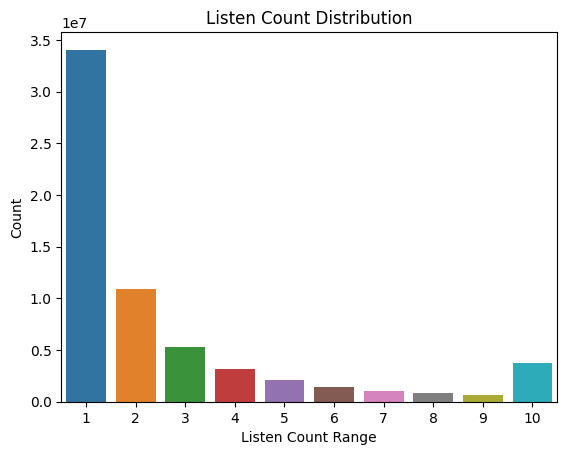

In [ ]:
# listen_count 기준으로 나누어서 시각화
# bins = [0,1,2,3,4,5,6,7,8,9,10000]#20,30,40,50,60,70,80,90,100,1000]
# labels = [1,2,3,4,5,6,7,8,9,10]#'20','30','40','50','60','70','80','90','100','1000']

# df_3b['listen_count_bin'] = pd.cut(df_3b['listen_count'], bins=bins, labels=labels)

# # seaborn을 사용하여 시각화
# sns.countplot(x='listen_count_bin', data=df_3b)
# plt.title('Listen Count Distribution')
# plt.xlabel('Listen Count Range')
# plt.ylabel('Count')
# plt.show()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/집교 2_Team P/실험/using_100m/filtered_df.csv')

In [ ]:
df.head()

,user_id,track_id,listen_count,listen_count_bin
0,3653,174,1,1.0
1,3653,191,3,3.0
2,3653,420,1,1.0
3,3653,513,10,10.0
4,3653,542,3,3.0


In [ ]:
df.dropna(inplace=True)


In [ ]:
df.head()

,user_id,track_id,listen_count,listen_count_bin
0,3653,174,1,1.0
1,3653,191,3,3.0
2,3653,420,1,1.0
3,3653,513,10,10.0
4,3653,542,3,3.0


In [ ]:
# listen_count 기준으로 나누어서 시각화
bins = [0,1,3,5,7,11]#20,30,40,50,60,70,80,90,100,1000]
labels = [1,2,3,4,5]#'20','30','40','50','60','70','80','90','100','1000']

df['listen_count_bin'] = pd.cut(df['listen_count_bin'], bins=bins, labels=labels)
df.head()

,user_id,track_id,listen_count,listen_count_bin
0,3653,174,1,1
1,3653,191,3,2
2,3653,420,1,1
3,3653,513,10,5
4,3653,542,3,2


In [ ]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['user_id', 'track_id', 'listen_count_bin']], reader)

In [ ]:
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
# SVD 모델 초기화 및 학습
model = SVD(n_factors=64,random_state=42)  # n_factors는 잠재 요인의 수를 지정합니다.
model.fit(trainset)

# 테스트 데이터에 대한 예측
predictions = model.test(testset)

# 성능 평가 (RMSE 등)
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

In [ ]:

# SVD 모델 초기화 및 학습
model = SVD(n_factors=256, random_state=42)  # n_factors는 잠재 요인의 수를 지정합니다.
model.fit(trainset)

# 테스트 데이터에 대한 예측
predictions = model.test(testset)

# 성능 평가 (RMSE 등)
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 1.1037
MAE:  0.8310
RMSE: 1.1037170175429503
MAE: 0.8310083203880992


In [ ]:
# SVD 모델 초기화 및 학습
model = SVD(n_factors=512,random_state=42)  # n_factors는 잠재 요인의 수를 지정합니다.
model.fit(trainset)

# 테스트 데이터에 대한 예측
predictions = model.test(testset)

# 성능 평가 (RMSE 등)
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

RMSE: 1.0958
MAE:  0.8278


In [ ]:
# SVD 모델 초기화 및 학습
model = SVD(n_factors=512,n_epochs=50,random_state=42)  # n_factors는 잠재 요인의 수를 지정합니다.
model.fit(trainset)

# 테스트 데이터에 대한 예측
predictions = model.test(testset)

# 성능 평가 (RMSE 등)
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

RMSE: 1.0760
MAE:  0.8122


In [9]:
# SVD 모델 초기화 및 학습
model = SVD(n_factors=768,n_epochs=50,random_state=42)  # n_factors는 잠재 요인의 수를 지정합니다.
model.fit(trainset)

# 테스트 데이터에 대한 예측
predictions = model.test(testset)

# 성능 평가 (RMSE 등)
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

RMSE: 1.0693
MAE:  0.8098


In [ ]:
from sklearn.preprocessing import LabelEncoder
user_encoder = LabelEncoder()
track_encoder = LabelEncoder()
lyrics_encoder = LabelEncoder()
df['user_id'] = user_encoder.fit_transform(df['user_id'])
df['track_id'] = track_encoder.fit_transform(df['track_id'])

In [ ]:
# !pip install torch torchvision -U

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from tqdm import tqdm

# 데이터 불러오기 (예시: CSV 파일)
# Label Encoding
# PyTorch DataLoader에 맞게 데이터 변환
def df_to_tensor(dataset):
    users = torch.tensor(dataset['user_id'].values, dtype=torch.int)
    items = torch.tensor(dataset['track_id'].values, dtype=torch.int)
    ratings = torch.tensor(dataset['listen_count_bin'].values, dtype=torch.float)

    return users, items, ratings

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

train_users, train_items, train_ratings = df_to_tensor(train_df)
test_users, test_items, test_ratings = df_to_tensor(test_df)

train_data = TensorDataset(train_users, train_items, train_ratings)
test_data = TensorDataset(test_users, test_items, test_ratings)

train_loader = DataLoader(train_data, batch_size=4096, shuffle=True)
test_loader = DataLoader(test_data, batch_size=4096, shuffle=False)
n_users = (df['user_id'].nunique())
n_items = (df['track_id'].nunique())
print(n_users)
print(n_items)

24941
2342715


In [ ]:
import torch
from tqdm import tqdm
# 모델 정의
class SVDPyTorch(torch.nn.Module):
    def __init__(self, n_users, n_items, n_factors=512):
        super(SVDPyTorch, self).__init__()
        self.user_embedding = torch.nn.Embedding(n_users, n_factors)
        self.item_embedding = torch.nn.Embedding(n_items, n_factors)

    def forward(self, user, item):
        user_embed = self.user_embedding(user)
        item_embed = self.item_embedding(item)
        return (user_embed * item_embed).sum(dim=1)

# 모델 및 손실 함수, 옵티마이저 초기화
# model = SVDPyTorch(n_users, n_items, n_factors=512)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 모델 학습
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using",device)
model.to(device)

num_epochs = 30

for epoch in range(num_epochs):
    model.train()
    total_loss=0
    cnt=0
    for batch in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
        # cnt+=1
        user, item, rating = batch
        user, item, rating = user.to(device), item.to(device), rating.to(device)

        optimizer.zero_grad()
        predictions = model(user, item)
        loss = criterion(predictions, rating)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        # if cnt%3000==0:
        #     avg_loss = total_loss / cnt
        #     print(f'Mini-batch {cnt}/{14819}, Avg. Loss: {avg_loss:.4f}')
        #     # 모델 평가
        #     model.eval()
        #     all_true_ratings = []
        #     all_predictions = []

        #     with torch.no_grad():
        #         for batch in test_loader:
        #             user, item, rating = batch
        #             user, item, rating = user.to(device), item.to(device), rating.to(device)

        #             predictions = model(user, item)
        #             all_true_ratings.extend(rating.cpu().numpy())
        #             all_predictions.extend(predictions.cpu().numpy())

        #     rmse = np.sqrt(mean_squared_error(all_true_ratings, all_predictions))
        #     print(f"Epoch {epoch + 1}, Loss: {loss.item()}, Test RMSE: {rmse}")
        #     model.train()



    # 모델 평가
    model.eval()
    all_true_ratings = []
    all_predictions = []

    with torch.no_grad():
        for batch in tqdm(test_loader, desc='Evaluating'):
            user, item, rating = batch
            user, item, rating = user.to(device), item.to(device), rating.to(device)

            predictions = model(user, item)
            all_true_ratings.extend(rating.cpu().numpy())
            all_predictions.extend(predictions.cpu().numpy())

    rmse = np.sqrt(mean_squared_error(all_true_ratings, all_predictions))
    print(f"Epoch {epoch + 1}, Loss: {loss.item()}, Test RMSE: {rmse}")
    avg_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch+1}/{num_epochs}, Avg. Loss: {avg_loss:.4f}')

Using cuda


Evaluating: 100%|██████████| 3705/3705 [05:13<00:00, 11.81it/s]


Epoch 1, Loss: 118.29689025878906, Test RMSE: 12.825697898864746
Epoch 1/30, Avg. Loss: 166.1324


Evaluating: 100%|██████████| 3705/3705 [05:17<00:00, 11.66it/s]


Epoch 2, Loss: 36.13949966430664, Test RMSE: 10.045232772827148
Epoch 2/30, Avg. Loss: 47.1384


Evaluating: 100%|██████████| 3705/3705 [05:16<00:00, 11.71it/s]


Epoch 3, Loss: 15.622482299804688, Test RMSE: 8.584247589111328
Epoch 3/30, Avg. Loss: 16.6585


Evaluating: 100%|██████████| 3705/3705 [05:18<00:00, 11.65it/s]


Epoch 4, Loss: 8.308676719665527, Test RMSE: 7.716048717498779
Epoch 4/30, Avg. Loss: 8.6782


Evaluating: 100%|██████████| 3705/3705 [05:16<00:00, 11.71it/s]


Epoch 5, Loss: 6.2032012939453125, Test RMSE: 7.146212100982666
Epoch 5/30, Avg. Loss: 6.1584


Evaluating: 100%|██████████| 3705/3705 [05:18<00:00, 11.65it/s]


Epoch 6, Loss: 5.09007453918457, Test RMSE: 6.716675758361816
Epoch 6/30, Avg. Loss: 5.0746


Evaluating: 100%|██████████| 3705/3705 [05:19<00:00, 11.61it/s]


Epoch 7, Loss: 4.364506721496582, Test RMSE: 6.366113662719727
Epoch 7/30, Avg. Loss: 4.3616


Evaluating: 100%|██████████| 3705/3705 [05:19<00:00, 11.58it/s]


Epoch 8, Loss: 4.100457191467285, Test RMSE: 6.063671112060547
Epoch 8/30, Avg. Loss: 3.8844


Evaluating: 100%|██████████| 3705/3705 [05:19<00:00, 11.61it/s]


Epoch 9, Loss: 3.460094451904297, Test RMSE: 5.797023296356201
Epoch 9/30, Avg. Loss: 3.4848


Evaluating: 100%|██████████| 3705/3705 [05:18<00:00, 11.63it/s]


Epoch 10, Loss: 3.2548952102661133, Test RMSE: 5.557915210723877
Epoch 10/30, Avg. Loss: 3.1828


Evaluating: 100%|██████████| 3705/3705 [05:18<00:00, 11.64it/s]


Epoch 11, Loss: 2.7180917263031006, Test RMSE: 5.344301223754883
Epoch 11/30, Avg. Loss: 2.9113


Evaluating: 100%|██████████| 3705/3705 [05:21<00:00, 11.52it/s]


Epoch 12, Loss: 2.6225247383117676, Test RMSE: 5.149618625640869
Epoch 12/30, Avg. Loss: 2.6958


Evaluating:  25%|██▌       | 931/3705 [01:08<03:23, 13.61it/s]


KeyboardInterrupt: ignored